In [ ]:
import numpy as np

def compute_apy(initial_balance, annual_rate, threshold=1.25):
    # Constants
    increments = 1.0
    time_period = 1.0

    # Variables
    balance = initial_balance
    active_balance = initial_balance
    total_periods = 0

    # Loop until one year is completed
    while total_periods < 365:
        # Compute interest
        interest = (active_balance * annual_rate / 100) / 365
        balance += interest

        # Check if balance is above threshold to increase active balance
        if balance >= active_balance + increments * threshold:
            active_balance += increments

        # Increment time period
        total_periods += time_period

    # Compute APY
    apy = (balance / initial_balance) ** (1 / 1) - 1
    return apy * 100

# Validator sizes
validator_sizes = [32, 64, 128, 1024, 2048]

# Annual rate
annual_rate = 4

# Compute APY for each validator size
apy_list = [compute_apy(size, annual_rate) for size in validator_sizes]
apy_list

[4.002739726024607,
 4.039726027395774,
 4.058133561642996,
 4.0778895547946,
 4.079361087328803]

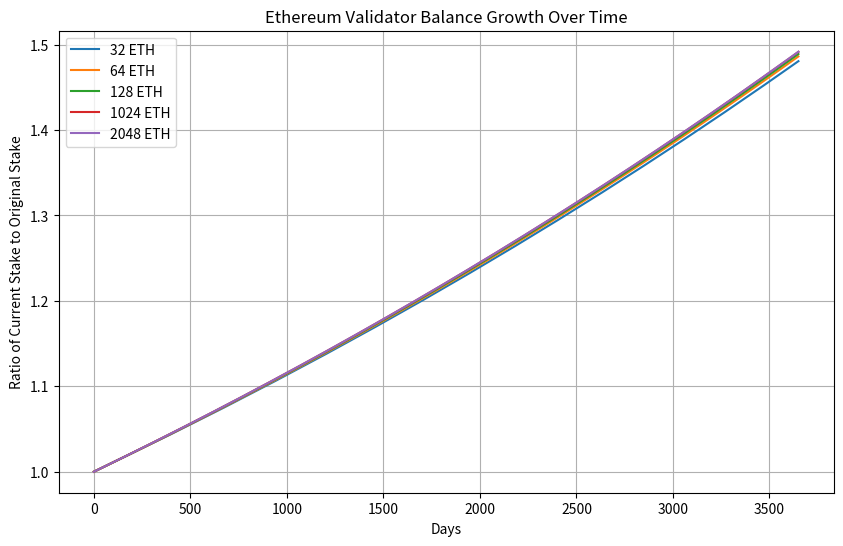

In [ ]:
import matplotlib.pyplot as plt

def compute_balance_over_years(initial_balance, annual_rate, years):
    # Constants
    increments = 1.0
    time_period = 1.0
    threshold = 1.25

    # Variables
    balance = initial_balance
    active_balance = initial_balance
    balances = [initial_balance]

    # Loop until the specified number of years is completed
    for total_periods in range(int(365 * years)):
        # Compute interest
        interest = (active_balance * annual_rate / 100) / 365
        balance += interest

        # Check if balance is above threshold to increase active balance
        if balance >= active_balance + increments * threshold:
            active_balance += increments

        # Store balance
        balances.append(balance)

    return balances

# Years
years = 10

# Compute balance over years for each validator size
active_balances_over_years = [compute_balance_over_years(size, annual_rate, years) for size in validator_sizes]

# Plot
plt.figure(figsize=(10, 6))
for i, balances in enumerate(active_balances_over_years):
    ratios = np.array(balances) / validator_sizes[i]
    plt.plot(range(365 * years + 1), ratios, label=f'{validator_sizes[i]} ETH')

plt.xlabel('Days')
plt.ylabel('Ratio of Current Stake to Original Stake')
plt.title('Ethereum Validator Balance Growth Over Time')
plt.legend()
plt.grid(True)
plt.show()

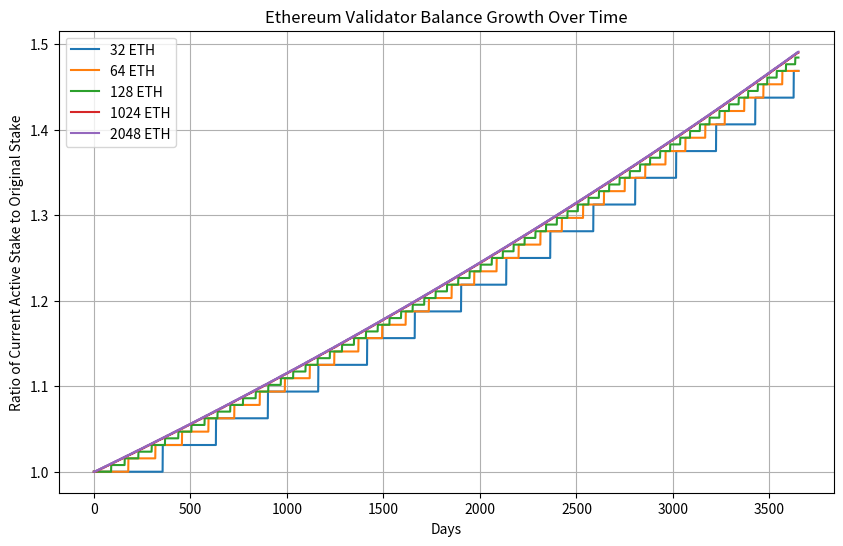

In [ ]:
import matplotlib.pyplot as plt

def compute_balance_over_years(initial_balance, annual_rate, years):
    # Constants
    increments = 1.0
    time_period = 1.0
    threshold = 1.25

    # Variables
    balance = initial_balance
    active_balance = initial_balance
    balances = [initial_balance]

    # Loop until the specified number of years is completed
    for total_periods in range(int(365 * years)):
        # Compute interest
        interest = (active_balance * annual_rate / 100) / 365
        balance += interest

        # Check if balance is above threshold to increase active balance
        if balance >= active_balance + increments * threshold:
            active_balance += increments

        # Store balance
        balances.append(active_balance)

    return balances

# Years
years = 10

# Compute balance over years for each validator size
active_balances_over_years = [compute_balance_over_years(size, annual_rate, years) for size in validator_sizes]

# Plot
plt.figure(figsize=(10, 6))
for i, balances in enumerate(active_balances_over_years):
    ratios = np.array(balances) / validator_sizes[i]
    plt.plot(range(365 * years + 1), ratios, label=f'{validator_sizes[i]} ETH')

plt.xlabel('Days')
plt.ylabel('Ratio of Current Active Stake to Original Stake')
plt.title('Ethereum Validator Balance Growth Over Time')
plt.legend()
plt.grid(True)
plt.show()

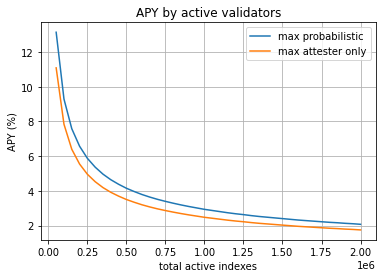

In [14]:
# Constants

SLOTS_PER_EPOCH = 32
SECONDS_PER_SLOT = 12
MAX_EFFECTIVE_BALANCE = 32_000_000_000
EFFECTIVE_BALANCE_INCREMENT = 1_000_000_000
BASE_REWARD_FACTOR = 64
TIMELY_SOURCE_WEIGHT = 14
TIMELY_TARGET_WEIGHT = 26
TIMELY_HEAD_WEIGHT = 14
WEIGHT_DENOMINATOR = 64
PARTICIPATION_FLAG_WEIGHTS = [TIMELY_SOURCE_WEIGHT, TIMELY_TARGET_WEIGHT, TIMELY_HEAD_WEIGHT]

# Helper functions

def integer_squareroot(n):
    """
    Return the largest integer ``x`` such that ``x**2 <= n``.
    """
    x = n
    y = (x + 1) // 2
    while y < x:
        x = y
        y = (x + n // x) // 2
    return x

# Modified `get_base_reward_per_increment` without calculating `total_active_balance` from state

def get_base_reward_per_increment(total_active_balance):
    return EFFECTIVE_BALANCE_INCREMENT * BASE_REWARD_FACTOR // integer_squareroot(total_active_balance)

# Modified `get_base_reward` for a validator with MaxEB

def get_base_reward(total_active_balance):
    increments = MAX_EFFECTIVE_BALANCE // EFFECTIVE_BALANCE_INCREMENT
    return increments * get_base_reward_per_increment(total_active_balance)

def validator_max_apy(total_active_balance):
    epochs_in_year = 365 * 24 * 60 * 60 / SECONDS_PER_SLOT / SLOTS_PER_EPOCH
    rewards_year = epochs_in_year * get_base_reward(total_active_balance)
    return rewards_year / MAX_EFFECTIVE_BALANCE

def validator_max_attester_apy(total_active_balance):
    return validator_max_apy(total_active_balance) * sum(PARTICIPATION_FLAG_WEIGHTS) / WEIGHT_DENOMINATOR

total_active_indexes_arr = range(50_000, 2_050_000, 50_000)
apy_max_arr = [100 * validator_max_apy(total_active_indexes * MAX_EFFECTIVE_BALANCE) for total_active_indexes in total_active_indexes_arr]
apy_max_attester_arr = [100 * validator_max_attester_apy(total_active_indexes * MAX_EFFECTIVE_BALANCE) for total_active_indexes in total_active_indexes_arr]

import matplotlib.pyplot as plt
plt.plot(total_active_indexes_arr, apy_max_arr, label='max probabilistic')
plt.plot(total_active_indexes_arr, apy_max_attester_arr, label='max attester only')
plt.xlabel('total active indexes')
plt.ylabel('APY (%)')
plt.title('APY by active validators')
plt.grid()
plt.legend()
plt.show()

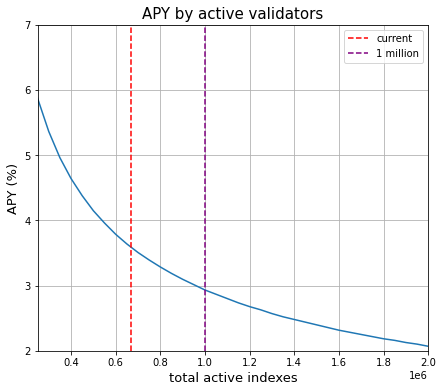

In [15]:
f, ax = plt.subplots(figsize=(7,6))

ax.plot(total_active_indexes_arr, apy_max_arr)
# ax.plot(total_active_indexes_arr, apy_max_attester_arr, label='max attester only')
ax.set_xlabel('total active indexes', size=13)
ax.set_ylabel('APY (%)', size=13)
ax.set_title('APY by active validators', size=15)
ax.axvline(670000, color='r', linestyle='--', label='current')
ax.axvline(1000000, color='purple', linestyle='--', label='1 million')
ax.set_xlim(250000, 2000000)
ax.set_ylim(2, 7)

ax.grid()
ax.legend()
plt.show()